Backtesting Progress: 100%|█████████████████████████████████████████████████████| 5882/5882 [00:00<00:00, 20566.48it/s]


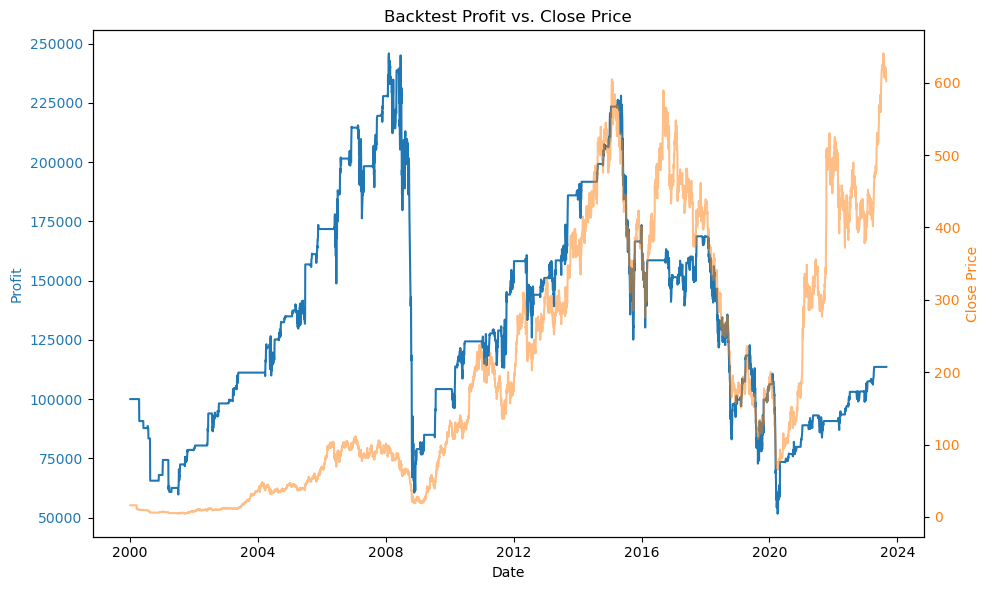

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Fetch historical data for Tata Motors
tata = yf.Ticker("TATAMOTORS.BO")
data = tata.history(period="max")

# Calculate RSI
def calculate_rsi(data, window=14):
    diff = data['Close'].diff()
    gain = diff.where(diff > 0, 0)
    loss = -diff.where(diff < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Parameters
initial_balance = 100000
rsi_buy_threshold = 30
rsi_sell_threshold = 70
investment_ratio = 0.2  # 20%

# Initialize variables
balance = initial_balance
shares = 0
profits = []

# Perform backtesting with progress bar
for index, row in tqdm(data.iterrows(), total=len(data), desc="Backtesting Progress"):
    if row['RSI'] <= rsi_buy_threshold and balance > 0:
        investment_amount = balance * investment_ratio
        shares_to_buy = investment_amount // row['Close']
        shares += shares_to_buy
        balance -= shares_to_buy * row['Close']
    
    if row['RSI'] >= rsi_sell_threshold and shares > 0:
        balance += shares * row['Close']
        shares = 0
    
    profits.append(balance + shares * row['Close'])

# Plotting the profit and close price graph
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(data.index, profits, label='Profit', color='tab:blue')
ax2.plot(data.index, data['Close'], label='Close', color='tab:orange', alpha=0.5)

ax1.set_xlabel('Date')
ax1.set_ylabel('Profit', color='tab:blue')
ax2.set_ylabel('Close Price', color='tab:orange')

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Backtest Profit vs. Close Price')
plt.tight_layout()
plt.show()


Backtesting Progress: 100%|█████████████████████████████████████████████████████| 5882/5882 [00:00<00:00, 20423.65it/s]


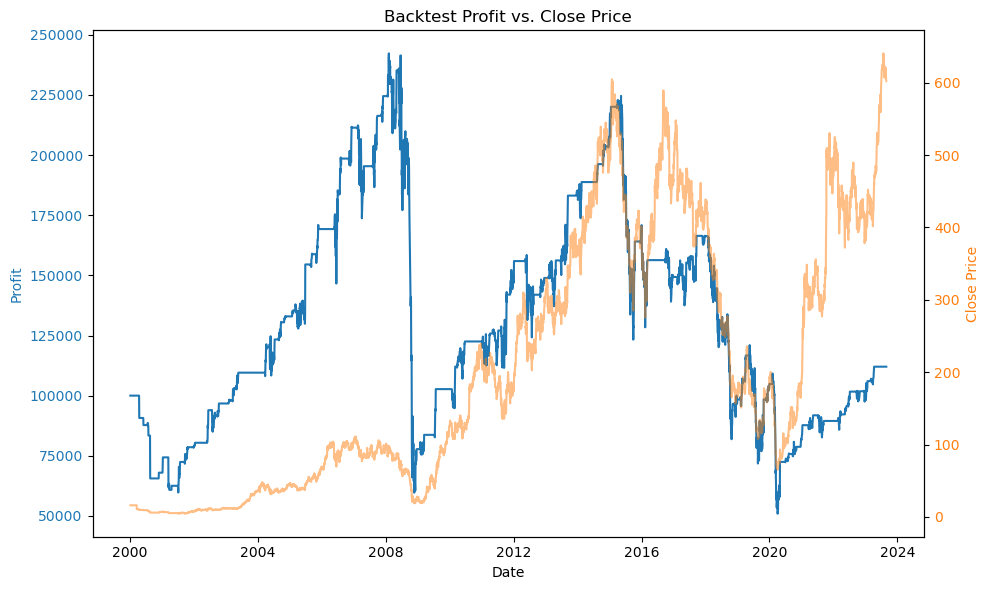

                         Date Action  Shares       Price
0   2000-03-16 00:00:00+05:30    Buy  1874.0   10.669065
1   2000-03-17 00:00:00+05:30    Buy  1499.0   10.669065
2   2000-03-20 00:00:00+05:30    Buy  1199.0   10.669065
3   2000-03-21 00:00:00+05:30    Buy   960.0   10.669065
4   2000-03-22 00:00:00+05:30    Buy   768.0   10.669065
..                        ...    ...     ...         ...
789 2023-01-24 00:00:00+05:30   Sell   198.0  422.100006
790 2023-03-02 00:00:00+05:30    Buy    50.0  420.450012
791 2023-03-27 00:00:00+05:30    Buy    41.0  411.850006
792 2023-03-28 00:00:00+05:30    Buy    33.0  401.700012
793 2023-04-10 00:00:00+05:30   Sell   124.0  461.049988

[794 rows x 4 columns]


In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Fetch historical data for Tata Motors
tata = yf.Ticker("TATAMOTORS.BO")
data = tata.history(period="max")

# Calculate RSI
def calculate_rsi(data, window=14):
    diff = data['Close'].diff()
    gain = diff.where(diff > 0, 0)
    loss = -diff.where(diff < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Parameters
initial_balance = 100000
rsi_buy_threshold = 30
rsi_sell_threshold = 70
investment_ratio = 0.2  # 20%

# Initialize variables and lists to track transactions
balance = initial_balance
shares = 0
profits = []
transactions = []

# Perform backtesting with progress bar
for index, row in tqdm(data.iterrows(), total=len(data), desc="Backtesting Progress"):
    if row['RSI'] <= rsi_buy_threshold and balance > 0:
        investment_amount = balance * investment_ratio
        shares_to_buy = investment_amount // row['Close']
        shares += shares_to_buy
        balance -= shares_to_buy * row['Close']
        transactions.append({"Date": row.name, "Action": "Buy", "Shares": shares_to_buy, "Price": row['Close']})
    
    if row['RSI'] >= rsi_sell_threshold and shares > 0:
        shares_to_sell = shares
        balance += shares_to_sell * row['Close']
        shares -= shares_to_sell
        transactions.append({"Date": row.name, "Action": "Sell", "Shares": shares_to_sell, "Price": row['Close']})
    
    profits.append(balance + shares * row['Close'])

# Create a DataFrame to store transaction details
transactions_df = pd.DataFrame(transactions)

# Plotting the profit and close price graph
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(data.index, profits, label='Profit', color='tab:blue')
ax2.plot(data.index, data['Close'], label='Close', color='tab:orange', alpha=0.5)

ax1.set_xlabel('Date')
ax1.set_ylabel('Profit', color='tab:blue')
ax2.set_ylabel('Close Price', color='tab:orange')

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Backtest Profit vs. Close Price')
plt.tight_layout()
plt.show()

# Display the transaction details
print(transactions_df)


In [19]:
transactions_df.to_csv('C:\\Users\\Yash\\Downloads\\Transactions.csv')

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Yash\\Downloads\\Transactions.csv'

Backtesting Progress: 100%|█████████████████████████████████████████████████████| 5883/5883 [00:00<00:00, 21883.42it/s]


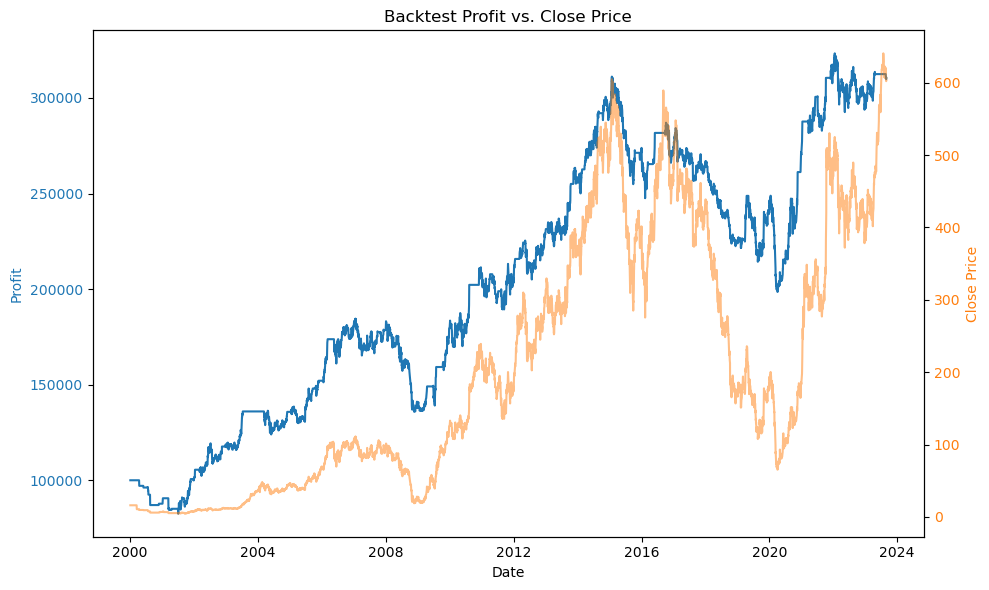

In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Fetch historical data for Tata Motors
tata = yf.Ticker("TATAMOTORS.BO")
data = tata.history(period="max")

# Calculate RSI
def calculate_rsi(data, window=14):
    diff = data['Close'].diff()
    gain = diff.where(diff > 0, 0)
    loss = -diff.where(diff < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Parameters
initial_balance = 100000
rsi_buy_threshold = 39
rsi_sell_threshold = 84
investment_ratio = 0.3  # 20%

# Initialize variables and lists to track transactions
balance = initial_balance
shares = 0
profits = []
transactions = []

# Perform backtesting with progress bar
for index, row in tqdm(data.iterrows(), total=len(data), desc="Backtesting Progress"):
    if shares == 0 and row['RSI'] <= rsi_buy_threshold and balance > 0:
        investment_amount = balance * investment_ratio
        shares_to_buy = investment_amount // row['Close']
        shares += shares_to_buy
        balance -= shares_to_buy * row['Close']
        transactions.append({"Date": row.name, "Action": "Buy", "Shares": shares_to_buy, "Price": row['Close']})
    
    if shares > 0 and row['RSI'] >= rsi_sell_threshold:
        shares_to_sell = shares
        balance += shares_to_sell * row['Close']
        shares -= shares_to_sell
        transactions.append({"Date": row.name, "Action": "Sell", "Shares": shares_to_sell, "Price": row['Close']})
    
    profits.append(balance + shares * row['Close'])

# Create a DataFrame to store transaction details
transactions_df = pd.DataFrame(transactions)

# Plotting the profit and close price graph
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(data.index, profits, label='Profit', color='tab:blue')
ax2.plot(data.index, data['Close'], label='Close', color='tab:orange', alpha=0.5)

ax1.set_xlabel('Date')
ax1.set_ylabel('Profit', color='tab:blue')
ax2.set_ylabel('Close Price', color='tab:orange')

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Backtest Profit vs. Close Price')
plt.tight_layout()
plt.show()

# Display the transaction details
print(transactions_df)


In [21]:
transactions_df.to_csv('C:\\Users\\Yash\\Downloads\\Transactions.csv')

In [30]:
import yfinance as yf
import pandas as pd
import multiprocessing
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

# Fetch historical data for Tata Motors
tata = yf.Ticker("TATAMOTORS.BO")
data = tata.history(period="max")

# Calculate RSI
def calculate_rsi(data, window=14):
    diff = data['Close'].diff()
    gain = diff.where(diff > 0, 0)
    loss = -diff.where(diff < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Parameters
initial_balance = 100000
investment_ratios = [0.2]  # Test different investment ratios
rsi_buy_thresholds = list(range(15, 40))  # Test different RSI buy thresholds
rsi_sell_thresholds = list(range(60, 85))  # Test different RSI sell thresholds

# Backtest strategy for a specific set of parameters
def backtest_strategy(params):
    rsi_buy_threshold, rsi_sell_threshold, investment_ratio = params
    balance = initial_balance
    shares = 0

    for index, row in data.iterrows():
        if shares == 0 and row['RSI'] <= rsi_buy_threshold and balance > 0:
            investment_amount = balance * investment_ratio
            shares_to_buy = investment_amount // row['Close']
            shares += shares_to_buy
            balance -= shares_to_buy * row['Close']

        if shares > 0 and row['RSI'] >= rsi_sell_threshold:
            shares_to_sell = shares
            balance += shares_to_sell * row['Close']
            shares -= shares_to_sell

    return balance

# Using CPU parallel processing for grid search
cores = multiprocessing.cpu_count()
best_profit = float('-inf')
best_params = None

with ThreadPoolExecutor(max_workers=cores) as executor:
    params_list = [(rsi_buy, rsi_sell, invest_ratio) 
                   for rsi_buy in rsi_buy_thresholds 
                   for rsi_sell in rsi_sell_thresholds 
                   for invest_ratio in investment_ratios]
    results = list(tqdm(executor.map(backtest_strategy, params_list), total=len(params_list)))

for idx, profit in enumerate(results):
    if profit > best_profit:
        best_profit = profit
        best_params = params_list[idx]

best_rsi_buy, best_rsi_sell, best_investment_ratio = best_params

print(f"Best RSI Buy Threshold: {best_rsi_buy}")
print(f"Best RSI Sell Threshold: {best_rsi_sell}")
print(f"Best Investment Ratio: {best_investment_ratio}")
print(f"Best Profit: {best_profit:.2f}")


100%|████████████████████████████████████████████████████████████████████████████████| 625/625 [02:25<00:00,  4.29it/s]

Best RSI Buy Threshold: 36
Best RSI Sell Threshold: 84
Best Investment Ratio: 0.2
Best Profit: 242955.77


In [ ]:
import yfinance as yf
import pandas as pd
import multiprocessing
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

# Fetch historical data for Tata Motors
tata = yf.Ticker("TATAMOTORS.BO")
data = tata.history(period="max")

# Calculate RSI
def calculate_rsi(data, window=14):
    diff = data['Close'].diff()
    gain = diff.where(diff > 0, 0)
    loss = -diff.where(diff < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Parameters
initial_balance = 100000
investment_ratios = [0.2]  # Test different investment ratios
rsi_buy_thresholds = list(range(15, 40))  # Test different RSI buy thresholds
rsi_sell_thresholds = list(range(60, 85))  # Test different RSI sell thresholds
window_ranges = list(range(7,70))  # Test different window ranges

# Backtest strategy for a specific set of parameters
def backtest_strategy(params):
    window, rsi_buy_threshold, rsi_sell_threshold, investment_ratio = params
    data['RSI'] = calculate_rsi(data, window=window)
    
    balance = initial_balance
    shares = 0

    for index, row in data.iterrows():
        if shares == 0 and row['RSI'] <= rsi_buy_threshold and balance > 0:
            investment_amount = balance * investment_ratio
            shares_to_buy = investment_amount // row['Close']
            shares += shares_to_buy
            balance -= shares_to_buy * row['Close']

        if shares > 0 and row['RSI'] >= rsi_sell_threshold:
            shares_to_sell = shares
            balance += shares_to_sell * row['Close']
            shares -= shares_to_sell

    return balance

# Using CPU parallel processing for grid search
cores = multiprocessing.cpu_count()
best_profit = float('-inf')
best_params = None

with ThreadPoolExecutor(max_workers=cores) as executor:
    params_list = [(window, rsi_buy, rsi_sell, invest_ratio) 
                   for window in window_ranges
                   for rsi_buy in rsi_buy_thresholds 
                   for rsi_sell in rsi_sell_thresholds 
                   for invest_ratio in investment_ratios]
    results = list(tqdm(executor.map(backtest_strategy, params_list), total=len(params_list)))

for idx, profit in enumerate(results):
    if profit > best_profit:
        best_profit = profit
        best_params = params_list[idx]

best_window, best_rsi_buy, best_rsi_sell, best_investment_ratio = best_params

print(f"Best Window: {best_window}")
print(f"Best RSI Buy Threshold: {best_rsi_buy}")
print(f"Best RSI Sell Threshold: {best_rsi_sell}")
print(f"Best Investment Ratio: {best_investment_ratio}")
print(f"Best Profit: {best_profit:.2f}")


In [ ]:
import yfinance as yf
import pandas as pd
import multiprocessing
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

# Fetch historical data for Tata Motors
tata = yf.Ticker("TATAMOTORS.BO")
data = tata.history(period="max")

# Calculate RSI
def calculate_rsi(data, window=14):
    diff = data['Close'].diff()
    gain = diff.where(diff > 0, 0)
    loss = -diff.where(diff < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Parameters
initial_balance = 100000
investment_ratios = [0.2]  # Test different investment ratios
rsi_buy_thresholds = list(range(15, 40))  # Test different RSI buy thresholds
rsi_sell_thresholds = list(range(60, 85))  # Test different RSI sell thresholds
window_ranges = list(range(7, 70))  # Test different window ranges

# Backtest strategy for a specific set of parameters
def backtest_strategy(params):
    window, rsi_buy_threshold, rsi_sell_threshold, investment_ratio = params
    
    # Reset index to handle potential duplicates
    data_reset = data.reset_index()
    
    # Calculate RSI and remove NaN values
    data_reset['RSI'] = calculate_rsi(data_reset, window=window)
    data_reset.dropna(subset=['RSI'], inplace=True)
    
    # Restore original index after calculations
    data_reset.set_index('Date', inplace=True)
    
    if data_reset['RSI'].isnull().all():
        return 0.0  # Return a minimal profit or any placeholder value
    
    balance = initial_balance
    shares = 0

    for index, row in data_reset.iterrows():
        if shares == 0 and row['RSI'] <= rsi_buy_threshold and balance > 0:
            investment_amount = balance * investment_ratio
            shares_to_buy = investment_amount // row['Close']
            shares += shares_to_buy
            balance -= shares_to_buy * row['Close']

        if shares > 0 and row['RSI'] >= rsi_sell_threshold:
            shares_to_sell = shares
            balance += shares_to_sell * row['Close']
            shares -= shares_to_sell

    return balance

# Using CPU parallel processing for grid search
cores = multiprocessing.cpu_count()
best_profit = float('-inf')
best_params = None

with ThreadPoolExecutor(max_workers=cores) as executor:
    params_list = [(window, rsi_buy, rsi_sell, invest_ratio) 
                   for window in window_ranges
                   for rsi_buy in rsi_buy_thresholds 
                   for rsi_sell in rsi_sell_thresholds 
                   for invest_ratio in investment_ratios]
    results = list(tqdm(executor.map(backtest_strategy, params_list), total=len(params_list)))

for idx, profit in enumerate(results):
    if profit > best_profit:
        best_profit = profit
        best_params = params_list[idx]

best_window, best_rsi_buy, best_rsi_sell, best_investment_ratio = best_params

print(f"Best Window: {best_window}")
print(f"Best RSI Buy Threshold: {best_rsi_buy}")
print(f"Best RSI Sell Threshold: {best_rsi_sell}")
print(f"Best Investment Ratio: {best_investment_ratio}")
print(f"Best Profit: {best_profit:.2f}")



 14%|██████████▊                                                                | 5708/39375 [22:43<2:14:00,  4.19it/s]


In [1]:
import yfinance as yf
import pandas as pd
import multiprocessing
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

# Fetch historical data for Tata Motors
tata = yf.Ticker("TATAMOTORS.BO")
data = tata.history(period="max")

# Calculate RSI
def calculate_rsi(data, window=14):
    diff = data['Close'].diff()
    gain = diff.where(diff > 0, 0)
    loss = -diff.where(diff < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Parameters
initial_balance = 100000
investment_ratios = [0.2]  # Test different investment ratios
rsi_buy_thresholds = list(range(15, 40))  # Test different RSI buy thresholds
rsi_sell_thresholds = list(range(60, 85))  # Test different RSI sell thresholds
window_ranges = list(range(7, 70))  # Test different window ranges

# Backtest strategy for a specific set of parameters
def backtest_strategy(params):
    window, rsi_buy_threshold, rsi_sell_threshold, investment_ratio = params
    
    # Reset index to handle potential duplicates
    data_reset = data.reset_index()
    
    # Calculate RSI and remove NaN values
    data_reset['RSI'] = calculate_rsi(data_reset, window=window)
    data_reset.dropna(subset=['RSI'], inplace=True)
    
    # Restore original index after calculations
    data_reset.set_index('Date', inplace=True)
    
    if data_reset['RSI'].isnull().all():
        return 0, 0  # Return counts for minimal profit or any placeholder value
    
    balance = initial_balance
    shares = 0
    profit_count = 0
    loss_count = 0

    for index, row in data_reset.iterrows():
        if shares == 0 and row['RSI'] <= rsi_buy_threshold and balance > 0:
            investment_amount = balance * investment_ratio
            shares_to_buy = investment_amount // row['Close']
            shares += shares_to_buy
            balance -= shares_to_buy * row['Close']

        if shares > 0 and row['RSI'] >= rsi_sell_threshold:
            shares_to_sell = shares
            balance += shares_to_sell * row['Close']
            shares -= shares_to_sell
            
            if balance > initial_balance:
                profit_count += 1
            else:
                loss_count += 1
    
    return profit_count, loss_count

# Using CPU parallel processing for grid search
cores = multiprocessing.cpu_count()
best_profit_count = 0
best_loss_count = float('inf')
best_params = None

with ThreadPoolExecutor(max_workers=cores) as executor:
    params_list = [(window, rsi_buy, rsi_sell, invest_ratio) 
                   for window in window_ranges
                   for rsi_buy in rsi_buy_thresholds 
                   for rsi_sell in rsi_sell_thresholds 
                   for invest_ratio in investment_ratios]
    results = list(tqdm(executor.map(backtest_strategy, params_list), total=len(params_list)))

for idx, (profit_count, loss_count) in enumerate(results):
    if profit_count > best_profit_count or (profit_count == best_profit_count and loss_count < best_loss_count):
        best_profit_count = profit_count
        best_loss_count = loss_count
        best_params = params_list[idx]

best_window, best_rsi_buy, best_rsi_sell, best_investment_ratio = best_params

print(f"Best Window: {best_window}")
print(f"Best RSI Buy Threshold: {best_rsi_buy}")
print(f"Best RSI Sell Threshold: {best_rsi_sell}")
print(f"Best Investment Ratio: {best_investment_ratio}")
print(f"Most Profitable Count: {best_profit_count}")
print(f"Least Loss Count: {best_loss_count}")


100%|██████████████████████████████████████████████████████████████████████████| 39375/39375 [2:34:47<00:00,  4.24it/s]

Best Window: 7
Best RSI Buy Threshold: 39
Best RSI Sell Threshold: 60
Best Investment Ratio: 0.2
Most Profitable Count: 252
Least Loss Count: 19


Parameter Optimization: 100%|██████████████████████████████████████████████████████| 9600/9600 [40:31<00:00,  3.95it/s]


Best Parameters: {'rsi_buy_threshold': 59, 'rsi_sell_threshold': 99, 'investment_ratio': 0.45000000000000007}


Backtesting Progress: 100%|█████████████████████████████████████████████████████| 5883/5883 [00:00<00:00, 22772.60it/s]


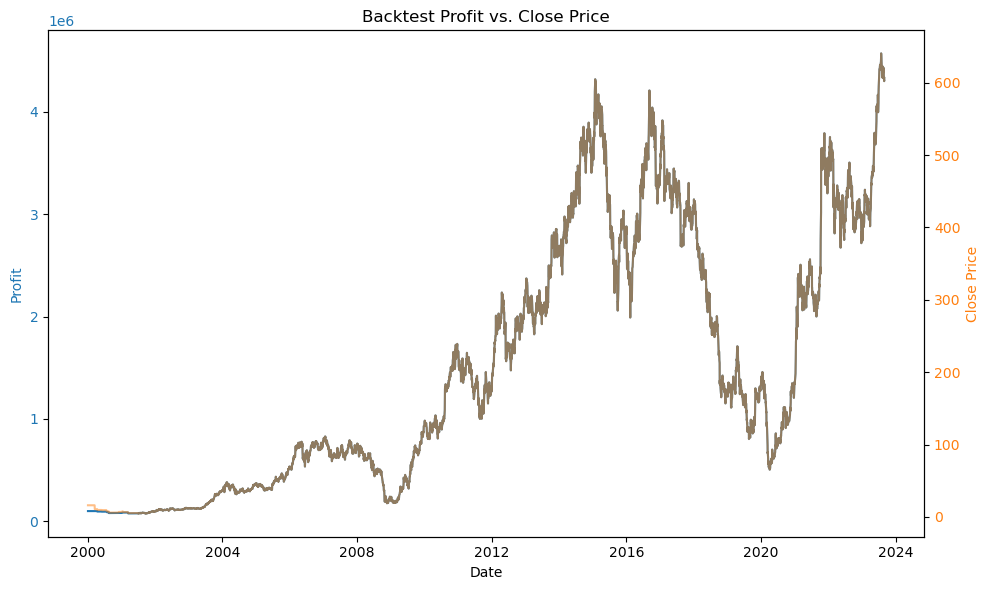

                       Date Action  Shares      Price
0 2000-03-16 00:00:00+05:30    Buy  4217.0  10.669066
1 2000-07-18 00:00:00+05:30   Sell  4217.0   9.409522
2 2000-07-21 00:00:00+05:30    Buy  4812.0   8.853843
3 2000-11-23 00:00:00+05:30   Sell  4812.0   6.186577
4 2000-12-25 00:00:00+05:30    Buy  5374.0   6.853392
5 2001-01-08 00:00:00+05:30   Sell  5374.0   7.594300
6 2001-01-17 00:00:00+05:30    Buy  5776.0   6.686688
7 2001-04-18 00:00:00+05:30   Sell  5776.0   5.330830
8 2001-06-28 00:00:00+05:30    Buy  7071.0   4.964079


In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from itertools import product

# Fetch historical data for Tata Motors
tata = yf.Ticker("TATAMOTORS.BO")
data = tata.history(period="max")

# Calculate RSI
def calculate_rsi(data, window=14):
    diff = data['Close'].diff()
    gain = diff.where(diff > 0, 0)
    loss = -diff.where(diff < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Linear regression model to predict profit
def predict_profit(data, rsi_buy_threshold, rsi_sell_threshold, investment_ratio):
    balance = initial_balance
    shares = 0
    profits = []
    
    for _, row in data.iterrows():
        if shares == 0 and row['RSI'] <= rsi_buy_threshold and balance > 0:
            investment_amount = balance * investment_ratio
            shares_to_buy = investment_amount // row['Close']
            shares += shares_to_buy
            balance -= shares_to_buy * row['Close']
        
        if shares > 0 and row['RSI'] >= rsi_sell_threshold:
            shares_to_sell = shares
            balance += shares_to_sell * row['Close']
            shares -= shares_to_sell
        
        profits.append(balance + shares * row['Close'])
    
    return profits[-1] - initial_balance

# Define parameter ranges for optimization
rsi_buy_thresholds = np.arange(20, 60, 1)
rsi_sell_thresholds = np.arange(70, 100, 1)
investment_ratios = np.arange(0.1, 0.5, 0.05)

best_profit = -np.inf
best_params = {}

# Perform parameter optimization
for rsi_buy, rsi_sell, ratio in tqdm(product(rsi_buy_thresholds, rsi_sell_thresholds, investment_ratios), total=len(rsi_buy_thresholds) * len(rsi_sell_thresholds) * len(investment_ratios), desc="Parameter Optimization"):
    profit = predict_profit(data, rsi_buy, rsi_sell, ratio)
    
    if profit >= best_profit and (data[data['RSI'] <= rsi_buy].shape[0] > 0) and (data[data['RSI'] >= rsi_sell].shape[0] > 0):
        best_profit = profit
        best_params = {'rsi_buy_threshold': rsi_buy, 'rsi_sell_threshold': rsi_sell, 'investment_ratio': ratio}

# Use the best parameters to execute the strategy
print("Best Parameters:", best_params)

initial_balance = 100000
rsi_buy_threshold = best_params['rsi_buy_threshold']
rsi_sell_threshold = best_params['rsi_sell_threshold']
investment_ratio = best_params['investment_ratio']

balance = initial_balance
shares = 0
profits = []
transactions = []

for index, row in tqdm(data.iterrows(), total=len(data), desc="Backtesting Progress"):
    if shares == 0 and row['RSI'] <= rsi_buy_threshold and balance > 0:
        investment_amount = balance * investment_ratio
        shares_to_buy = investment_amount // row['Close']
        shares += shares_to_buy
        balance -= shares_to_buy * row['Close']
        transactions.append({"Date": row.name, "Action": "Buy", "Shares": shares_to_buy, "Price": row['Close']})
    
    if shares > 0 and row['RSI'] >= rsi_sell_threshold:
        shares_to_sell = shares
        balance += shares_to_sell * row['Close']
        shares -= shares_to_sell
        transactions.append({"Date": row.name, "Action": "Sell", "Shares": shares_to_sell, "Price": row['Close']})
    
    profits.append(balance + shares * row['Close'])

# Create a DataFrame to store transaction details
transactions_df = pd.DataFrame(transactions)

# Plotting the profit and close price graph
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(data.index, profits, label='Profit', color='tab:blue')
ax2.plot(data.index, data['Close'], label='Close', color='tab:orange', alpha=0.5)

ax1.set_xlabel('Date')
ax1.set_ylabel('Profit', color='tab:blue')
ax2.set_ylabel('Close Price', color='tab:orange')

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Backtest Profit vs. Close Price')
plt.tight_layout()
plt.show()

# Display the transaction details
print(transactions_df)


Backtesting Progress: 100%|█████████████████████████████████████████████████████| 5883/5883 [00:00<00:00, 20906.72it/s]


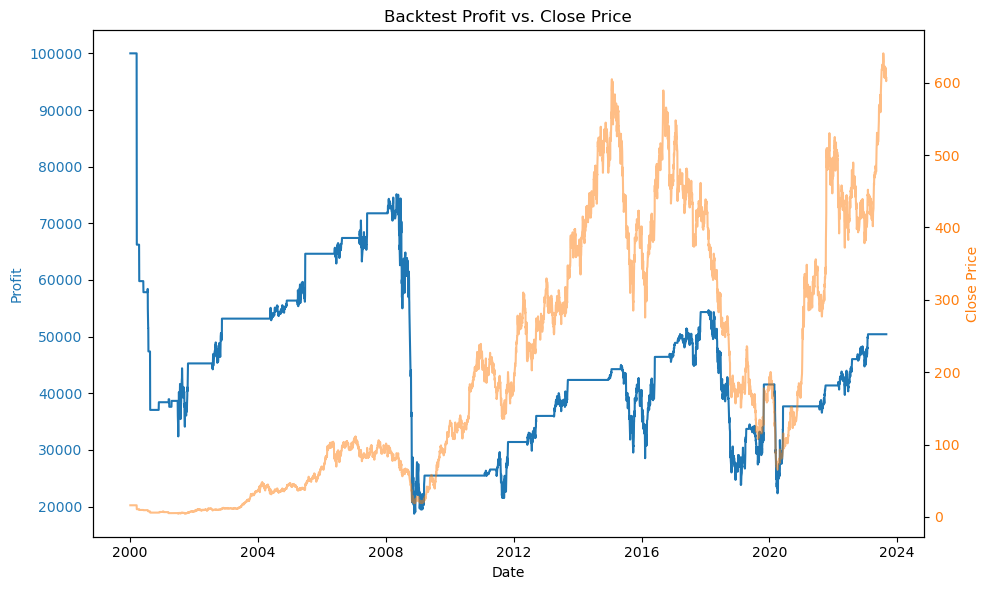

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import talib
from tqdm import tqdm

# Fetch historical data for Tata Motors
tata = yf.Ticker("TATAMOTORS.BO")
data = tata.history(period="max")

# Calculate RSI using TA-Lib
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)

# Parameters
initial_balance = 100000
rsi_buy_threshold = 30
rsi_sell_threshold = 70
investment_ratio = 0.2  # 20%

# Initialize variables
balance = initial_balance
shares = 0
profits = []

# Perform backtesting with progress bar
for index, row in tqdm(data.iterrows(), total=len(data), desc="Backtesting Progress"):
    if row['RSI'] <= rsi_buy_threshold and balance > 0:
        investment_amount = balance * investment_ratio
        shares_to_buy = investment_amount // row['Close']
        shares += shares_to_buy
        balance -= shares_to_buy * row['Close']
    
    if row['RSI'] >= rsi_sell_threshold and shares > 0:
        balance += shares * row['Close']
        shares = 0
    
    profits.append(balance + shares * row['Close'])

# Plotting the profit and close price graph
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(data.index, profits, label='Profit', color='tab:blue')
ax2.plot(data.index, data['Close'], label='Close', color='tab:orange', alpha=0.5)

ax1.set_xlabel('Date')
ax1.set_ylabel('Profit', color='tab:blue')
ax2.set_ylabel('Close Price', color='tab:orange')

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Backtest Profit vs. Close Price')
plt.tight_layout()
plt.show()

